## Creating dataframe with standarized bedtime, sleep duration, and activity.

In [2]:
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
all_summer_raw = pd.read_parquet('data/seattle_undergrad/raw/all_summer_raw.parquet')
all_summer_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.00,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.00,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2017-07-26 14:42:00,0,27.0,0.0,52.54,73.70,51.00,40.10,NaN,ACTIVE,summer170022,summer17
2017-07-26 14:42:15,0,105.0,0.0,247.24,115.00,136.00,81.30,NaN,ACTIVE,summer170022,summer17
2017-07-26 14:42:30,0,9.0,0.0,172.63,61.60,47.20,38.60,NaN,ACTIVE,summer170022,summer17


In [4]:
all_winter_raw = pd.read_parquet('data/seattle_undergrad/raw/all_winter_raw.parquet')
all_winter_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2018-02-08 00:52:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:52:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:52:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:52:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
2018-02-08 00:53:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0112,winter
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-07 15:34:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
2018-02-07 15:34:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter
2018-02-07 15:35:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,winter0041,winter


In [5]:
all_spring_raw = pd.read_parquet('data/seattle_undergrad/raw/all_spring_raw.parquet')
all_spring_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2017-03-24 17:07:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:07:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:07:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:07:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
2017-03-24 17:08:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_170019,spring_17
...,...,...,...,...,...,...,...,...,...,...,...
2018-05-08 15:20:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_180067,spring_18
2018-05-08 15:20:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_180067,spring_18
2018-05-08 15:20:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,spring_180067,spring_18


In [6]:
all_fall_raw = pd.read_parquet('data/seattle_undergrad/raw/all_fall_raw.parquet')
all_fall_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2015-10-06 10:00:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:00:15,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:00:30,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:00:45,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
2015-10-06 10:01:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,fall_150034,fall_15
...,...,...,...,...,...,...,...,...,...,...,...
2016-11-16 15:42:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,fall_160030,fall_16
2016-11-16 15:42:45,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,fall_160030,fall_16
2016-11-16 15:43:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,fall_160030,fall_16


In [70]:
all_summer_processed = pd.read_parquet('data/seattle_undergrad/processed/all_summertiming.parquet')
all_summer_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Sunrise,Sunset
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50,NaT,NaT
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25,NaT,NaT
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,summer170022,2017-07-26,500,2017-07-26 14:31:15,631.0,2017-07-26 09:16:15,316.0,0 days 01:02:00,0 days 00:18:30,62.00,...,summer17Wed,summer17Weekday,False,2017-07-26 00:00:00,2017-07-26 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-26 05:15:33.121509+01:00,2017-07-26 20:56:36.681919+01:00
4715,summer170022,2017-07-11,500,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer17Tues,summer17Weekday,False,2017-07-11 00:00:00,2017-07-11 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-11 04:56:35.228949+01:00,2017-07-11 21:13:53.510705+01:00
4716,summer170022,2017-07-23,500,2017-07-23 23:48:15,1188.0,2017-07-23 07:45:30,225.0,0 days 02:43:45,0 days 01:05:45,163.75,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-24 00:19:15,2017-07-24 06:22:15,0 days 06:03:00,1459.25,382.25,2017-07-23 05:11:21.627239+01:00,2017-07-23 21:00:47.238295+01:00
4717,summer170022,2017-07-16,500,2017-07-16 19:42:15,942.0,2017-07-16 09:05:15,305.0,0 days 00:58:15,0 days 00:26:00,58.25,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-17 02:58:00,2017-07-17 07:23:30,0 days 04:25:30,1618.00,443.50,2017-07-16 05:02:17.406115+01:00,2017-07-16 21:09:10.685513+01:00


In [8]:
all_winter_processed = pd.read_parquet('data/seattle_undergrad/processed/all_wintertiming.parquet')
all_winter_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,winter0112,2018-02-16,5,2018-02-17 03:07:45,1387.0,2018-02-16 13:46:30,586.0,0 days 01:21:15,0 days 00:00:00,81.25,...,winterFri,winterWeekday,False,2018-02-16 07:12:22.965821+00:00,2018-02-16 17:16:32.500559+00:00,2018-02-17 03:43:00,2018-02-17 12:41:15,0 days 08:58:15,1663.00,761.25
1,winter0112,2018-02-13,5,2018-02-14 01:29:00,1289.0,2018-02-13 11:05:15,425.0,0 days 02:15:00,0 days 00:02:45,135.00,...,winterTues,winterWeekday,False,2018-02-13 07:18:05.948565+00:00,2018-02-13 17:11:04.216088+00:00,2018-02-14 02:10:00,2018-02-14 07:23:45,0 days 05:13:45,1570.00,443.75
2,winter0112,2018-02-21,5,2018-02-22 01:51:15,1311.0,2018-02-21 11:10:00,430.0,0 days 02:19:00,0 days 00:26:00,139.00,...,winterWed,winterWeekday,False,2018-02-21 07:02:26.797121+00:00,2018-02-21 17:25:35.733208+00:00,2018-02-22 02:25:15,2018-02-22 10:29:30,0 days 08:04:15,1585.25,629.50
3,winter0112,2018-02-20,5,2018-02-21 01:19:30,1279.0,2018-02-20 14:08:45,608.0,0 days 05:03:15,0 days 00:00:00,303.25,...,winterTues,winterWeekday,False,2018-02-20 07:04:28.279350+00:00,2018-02-20 17:23:47.550573+00:00,2018-02-21 04:37:45,2018-02-21 10:59:15,0 days 06:21:30,1717.75,659.25
4,winter0112,2018-02-09,5,2018-02-10 02:05:30,1325.0,2018-02-09 11:06:15,426.0,0 days 03:52:30,0 days 00:16:45,232.50,...,winterFri,winterWeekday,False,2018-02-09 07:25:23.531289+00:00,2018-02-09 17:03:44.946935+00:00,2018-02-10 03:46:30,2018-02-10 12:44:30,0 days 08:58:00,1666.50,764.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,winter0041,2018-02-04,500,2018-02-04 23:37:15,1177.0,2018-02-04 08:14:30,254.0,0 days 02:40:00,0 days 00:50:00,160.00,...,winterSun,winterWeekend/Holiday,True,2018-02-04 07:33:54.448566+00:00,2018-02-04 16:54:36.077024+00:00,2018-02-05 01:26:45,2018-02-05 08:41:15,0 days 07:14:30,1526.75,521.25
1387,winter0041,2018-02-03,500,2018-02-03 22:36:30,1116.0,2018-02-03 16:33:15,753.0,0 days 00:32:30,0 days 00:00:00,32.50,...,winterSat,winterWeekend/Holiday,True,2018-02-03 07:35:31.319807+00:00,2018-02-03 16:52:46.709692+00:00,2018-02-04 02:13:15,2018-02-04 07:22:45,0 days 05:09:30,1573.25,442.75
1388,winter0041,2018-01-27,500,2018-01-28 02:03:00,1323.0,2018-01-27 15:50:45,710.0,0 days 00:24:30,0 days 00:00:00,24.50,...,winterSat,winterWeekend/Holiday,True,2018-01-27 07:45:53.448802+00:00,2018-01-27 16:40:10.781421+00:00,2018-01-28 02:58:45,2018-01-28 11:22:00,0 days 08:23:15,1618.75,682.00


In [9]:
all_spring_processed = pd.read_parquet('data/seattle_undergrad/processed/all_springtiming.parquet')
all_spring_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,spring_170019,2017-03-31,5,2017-03-31 23:55:30,1195.0,2017-03-31 06:12:00,132.0,0 days 04:43:00,0 days 01:09:15,283.00,...,spring_17Fri,spring_17Weekday,False,2017-03-31 06:37:41.938680+01:00,2017-03-31 19:31:30.421160+01:00,2017-04-01 00:56:15,2017-04-01 09:03:15,0 days 08:07:00,1496.25,543.25
1,spring_170019,2017-04-06,5,2017-04-07 01:36:15,1296.0,2017-04-06 10:04:45,364.0,0 days 08:47:45,0 days 01:42:30,527.75,...,spring_17Thu,spring_17Weekday,False,2017-04-06 06:24:12.056607+01:00,2017-04-06 19:41:32.496226+01:00,2017-04-07 01:44:15,2017-04-07 07:59:00,0 days 06:14:45,1544.25,479.00
2,spring_170019,2017-04-09,5,2017-04-10 00:28:45,1228.0,2017-04-09 09:03:45,303.0,0 days 09:00:15,0 days 02:03:45,540.25,...,spring_17Sun,spring_17Weekend/Holiday,True,2017-04-09 06:17:32.446357+01:00,2017-04-09 19:46:33.305047+01:00,2017-04-10 00:43:30,2017-04-10 09:04:30,0 days 08:21:00,1483.50,544.50
3,spring_170019,2017-03-26,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,spring_17Sun,spring_17Weekend/Holiday,True,2017-03-26 06:49:03.728552+01:00,2017-03-26 19:23:07.535446+01:00,2017-03-26 00:00:00,2017-03-26 00:00:00,0 days 00:00:00,0.00,0.00
4,spring_170019,2017-03-25,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,spring_17Sat,spring_17Weekend/Holiday,True,2017-03-25 05:51:20.474235+00:00,2017-03-25 18:21:26.741530+00:00,2017-03-25 00:00:00,2017-03-25 00:00:00,0 days 00:00:00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,spring_180067,2018-04-25,500,2018-04-25 20:05:45,965.0,2018-04-25 08:55:30,295.0,0 days 00:05:30,0 days 00:01:30,5.50,...,spring_18Wed,spring_18Weekday,False,2018-04-25 05:44:12.454147+01:00,2018-04-25 20:12:49.548789+01:00,2018-04-25 22:55:30,2018-04-26 06:19:30,0 days 07:24:00,1375.50,379.50
2910,spring_180067,2018-05-01,500,2018-05-01 18:13:30,853.0,2018-05-01 10:42:45,402.0,0 days 00:09:30,0 days 00:00:15,9.50,...,spring_18Tues,spring_18Weekday,False,2018-05-01 05:32:34.402405+01:00,2018-05-01 20:22:42.595092+01:00,2018-05-01 23:33:45,2018-05-02 09:28:30,0 days 09:54:45,1413.75,568.50
2911,spring_180067,2018-04-30,500,2018-04-30 19:13:15,913.0,2018-04-30 11:11:30,431.0,0 days 01:09:15,0 days 00:01:45,69.25,...,spring_18Mon,spring_18Weekday,False,2018-04-30 05:34:27.619621+01:00,2018-04-30 20:21:04.357167+01:00,2018-04-30 23:07:00,2018-05-01 07:54:00,0 days 08:47:00,1387.00,474.00


In [10]:
all_fall_processed = pd.read_parquet('data/seattle_undergrad/processed/all_falltiming.parquet')
all_fall_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,fall_150034,2015-10-16,5,2015-10-17 00:12:00,1212.0,2015-10-16 06:21:15,141.0,0 days 07:10:00,0 days 01:56:00,430.00,...,fall_15Fri,fall_15Weekday,False,2015-10-16 07:25:12.688462+01:00,2015-10-16 18:05:11.239169+01:00,2015-10-17 00:56:15,2015-10-17 05:36:30,0 days 04:40:15,1496.25,336.50
1,fall_150034,2015-10-17,5,2015-10-18 03:23:15,1403.0,2015-10-17 08:11:45,251.0,0 days 06:43:45,0 days 02:08:45,403.75,...,fall_15Sat,fall_15Weekend/Holiday,True,2015-10-17 07:26:54.874139+01:00,2015-10-17 18:03:03.941839+01:00,2015-10-18 03:41:15,2015-10-18 07:44:00,0 days 04:02:45,1661.25,464.00
2,fall_150034,2015-10-15,5,2015-10-15 22:58:15,1138.0,2015-10-15 06:16:15,136.0,0 days 07:15:30,0 days 02:21:30,435.50,...,fall_15Thu,fall_15Weekday,False,2015-10-15 07:23:30.812126+01:00,2015-10-15 18:07:19.387314+01:00,2015-10-16 00:07:00,2015-10-16 04:41:30,0 days 04:34:30,1447.00,281.50
3,fall_150034,2015-10-18,5,2015-10-19 00:08:45,1208.0,2015-10-18 08:36:15,276.0,0 days 02:50:30,0 days 00:57:30,170.50,...,fall_15Sun,fall_15Weekend/Holiday,True,2015-10-18 07:28:37.367299+01:00,2015-10-18 18:00:57.533975+01:00,2015-10-19 00:55:30,2015-10-19 05:05:30,0 days 04:10:00,1495.50,305.50
4,fall_150034,2015-10-09,5,2015-10-10 00:26:15,1226.0,2015-10-09 06:06:45,126.0,0 days 06:47:00,0 days 02:24:45,407.00,...,fall_15Fri,fall_15Weekday,False,2015-10-09 07:13:26.008528+01:00,2015-10-09 18:20:24.052274+01:00,2015-10-10 01:06:15,2015-10-10 06:43:30,0 days 05:37:15,1506.25,403.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,fall_160030,2016-11-06,500,2016-11-07 00:05:15,1205.0,2016-11-06 11:25:45,445.0,0 days 00:35:45,0 days 00:00:30,35.75,...,fall_16Sun,fall_16Weekend/Holiday,True,2016-11-06 07:03:09.290174+00:00,2016-11-06 16:23:25.384252+00:00,2016-11-07 02:22:30,2016-11-07 07:52:00,0 days 05:29:30,1582.50,472.00
2092,fall_160030,2016-11-14,500,2016-11-14 22:44:00,1124.0,2016-11-14 08:30:00,270.0,0 days 04:30:15,0 days 01:38:00,270.25,...,fall_16Mon,fall_16Weekday,False,2016-11-14 07:17:06.993865+00:00,2016-11-14 16:11:16.336204+00:00,2016-11-15 03:09:15,2016-11-15 12:17:45,0 days 09:08:30,1629.25,737.75
2093,fall_160030,2016-11-13,500,2016-11-13 22:32:45,1112.0,2016-11-13 13:35:00,575.0,0 days 00:48:15,0 days 00:00:00,48.25,...,fall_16Sun,fall_16Weekend/Holiday,True,2016-11-13 07:15:23.596621+00:00,2016-11-13 16:12:40.100705+00:00,2016-11-14 04:23:00,2016-11-14 07:59:00,0 days 03:36:00,1703.00,479.00


In [71]:
#calculate total activity from wakeup to sleep and divides it by the amount of time the person was awake aka sleep-wakeup
def calculateActivity(wakeup, sleep, raw):
    if len(raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity')) == 0:
        return 0
    total_activity = raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity').iloc[0]
    total_hrs_awake = (sleep-wakeup)/datetime.timedelta(hours=1) #number of hours awake
    return total_activity/total_hrs_awake

def addActivityInfo(sleep_df, raw):
    length = sleep_df.shape[0]
    for i in range(length-1):
        sleep_df.iloc[i,sleep_df.columns.get_loc('Activity')] = calculateActivity(sleep_df['Sleep offset'].iloc[i], sleep_df['Sleep onset'].iloc[i+1], raw)
    return sleep_df

#converts column Sleep duration from a timedelta to a float
def timedeltaToFloat(timedelta):
    return timedelta/datetime.timedelta(hours=1)

def completeActivityDataframe(sleep_df, raw):
    zero_array = sleep_df.shape[0]*[0]
    sleep_df['Activity'] = zero_array
    raw = raw.reset_index().sort_values(by='DateTime')
    output = pd.DataFrame()
    for uid in sleep_df.UID.unique():
        unique_df = sleep_df[sleep_df['UID'] == uid].sort_values('Date')
        unique_raw = raw[raw['UID'] == uid]
        output = output.append(addActivityInfo(unique_df, unique_raw))
    return output

In [50]:
#earliest_bedtime must be greater than all bedtimes in activity_df. Even if it's just by 0.0001
def standarize_bedtime(bedtime, earliest_bedtime):
    if earliest_bedtime<=bedtime<=24:
        return bedtime-earliest_bedtime
    elif bedtime<16:
        return (24-earliest_bedtime)+bedtime
    else:
        return "error with standarizing"

In [49]:
def createDictionaries(activity_df):
    mean_sleep_dict = {}
    std_sleep_dict = {}
    mean_bedtime_dict = {}
    std_bedtime_dict = {}
    mean_activity_dict = {}
    std_activity_dict = {}
    for uid in activity_df.UID.unique():
        cur_df = activity_df[activity_df['UID']==uid]
        mean_sleep_dict[uid] = cur_df['Sleep duration'].mean()
        std_sleep_dict[uid] = cur_df['Sleep duration'].std()
        mean_bedtime_dict[uid] = cur_df['standarized_bedtime'].mean()
        std_bedtime_dict[uid] = cur_df['standarized_bedtime'].std()
        mean_activity_dict[uid] = cur_df['Activity'].mean()
        std_activity_dict[uid] = cur_df['Activity'].std()
    return mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict

In [48]:
def z_score_calculator(row, variable, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict):
    if variable == 'Sleep duration':
        return (row['Sleep duration'] - mean_sleep_dict[row['UID']])/std_sleep_dict[row['UID']]
    elif variable == 'standarized_bedtime':
        return (row['standarized_bedtime'] - mean_bedtime_dict[row['UID']])/std_bedtime_dict[row['UID']]
    elif variable == 'Activity':
        return (row['Activity'] - mean_activity_dict[row['UID']])/std_activity_dict[row['UID']]
    else:
        return "ERROR bad input to z_score_calculator"

def createStandarizedColumns(activity_df, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict):
#     activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, variable = 'Sleep duration',axis=1)
#     activity_df['bedtime_zscore'] = activity_df.apply(z_score_calculator, variable = 'standarized_bedtime',axis=1)
    activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, args = ('Sleep duration', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict) ,axis=1)
    activity_df['bedtime_zscore'] = activity_df.apply(z_score_calculator, args = ('standarized_bedtime', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict),axis=1)
    activity_df['activity_zscore'] = activity_df.apply(z_score_calculator, args = ('Activity', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict),axis=1)

**This function takes in raw data and processed data dataframes and outputs a cleaned activity_df with standarized columns for bedtime and sleep duration.**

In [72]:
#given raw data and processed data, will return a fully cleaned activity_df that has bedtime and sleep duration columns
#that are standarized by new methods.
def do_everything(raw, processed):
    activity_df = completeActivityDataframe(processed, raw)
    activity_df['Sleep duration'] = activity_df['Sleep duration'].apply(timedeltaToFloat)
    activity_df = activity_df[(activity_df['Activity']!=0)&(activity_df['Sleep duration']!=0)]
    activity_df['bedtime'] = activity_df['Sleep onset'].dt.strftime("%H").astype(int) + activity_df['Sleep onset'].dt.strftime("%M").astype(int)/60
    plt.hist(activity_df['bedtime'], bins=10)
    plt.show()
    gap_value = input('Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.')
    earliest_bedtime = activity_df[activity_df['bedtime']>15].sort_values(by='bedtime').bedtime.iloc[0]
    activity_df['standarized_bedtime'] = activity_df['bedtime'].apply(standarize_bedtime, earliest_bedtime = earliest_bedtime)
    mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict = createDictionaries(activity_df)
    createStandarizedColumns(activity_df, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict, mean_activity_dict, std_activity_dict)
    return activity_df


In [73]:
all_summer_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Sunrise,Sunset
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50,NaT,NaT
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25,NaT,NaT
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00,NaT,NaT
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4714,summer170022,2017-07-26,500,2017-07-26 14:31:15,631.0,2017-07-26 09:16:15,316.0,0 days 01:02:00,0 days 00:18:30,62.00,...,summer17Wed,summer17Weekday,False,2017-07-26 00:00:00,2017-07-26 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-26 05:15:33.121509+01:00,2017-07-26 20:56:36.681919+01:00
4715,summer170022,2017-07-11,500,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,summer17Tues,summer17Weekday,False,2017-07-11 00:00:00,2017-07-11 00:00:00,0 days 00:00:00,0.00,0.00,2017-07-11 04:56:35.228949+01:00,2017-07-11 21:13:53.510705+01:00
4716,summer170022,2017-07-23,500,2017-07-23 23:48:15,1188.0,2017-07-23 07:45:30,225.0,0 days 02:43:45,0 days 01:05:45,163.75,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-24 00:19:15,2017-07-24 06:22:15,0 days 06:03:00,1459.25,382.25,2017-07-23 05:11:21.627239+01:00,2017-07-23 21:00:47.238295+01:00
4717,summer170022,2017-07-16,500,2017-07-16 19:42:15,942.0,2017-07-16 09:05:15,305.0,0 days 00:58:15,0 days 00:26:00,58.25,...,summer17Sun,summer17Weekend/Holiday,True,2017-07-17 02:58:00,2017-07-17 07:23:30,0 days 04:25:30,1618.00,443.50,2017-07-16 05:02:17.406115+01:00,2017-07-16 21:09:10.685513+01:00


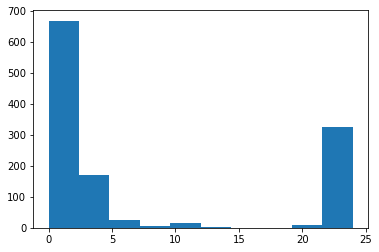

Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.15


,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Sleep onset MSLM,Sleep offset MSLM,Sunrise,Sunset,Activity,bedtime,standarized_bedtime,sleep_duration_zscore,bedtime_zscore,activity_zscore
14,summer_160048,2016-07-13,5,2016-07-13 18:54:00,894.0,2016-07-13 10:58:00,418.0,0 days 02:26:00,0 days 00:24:15,146.00,...,1606.50,529.25,NaT,NaT,15868.927303,2.766667,6.150000,-0.743735,0.311579,-0.801863
1102,summer_160048,2016-07-14,50,2016-07-15 01:26:30,1286.0,2016-07-14 09:27:30,327.0,0 days 02:43:45,0 days 00:59:45,163.75,...,1585.00,747.50,NaT,NaT,18214.776589,2.416667,5.800000,1.233268,0.067151,-0.395109
1099,summer_160048,2016-07-15,50,2016-07-15 23:10:30,1150.0,2016-07-15 13:46:15,586.0,0 days 01:49:00,0 days 00:00:00,109.00,...,1542.00,543.00,NaT,NaT,29356.921776,1.700000,5.083333,-0.098477,-0.433345,1.536863
2194,summer_160048,2016-07-16,500,2016-07-17 02:20:15,1340.0,2016-07-16 10:03:00,363.0,0 days 00:11:30,0 days 00:02:00,11.50,...,1725.50,814.50,NaT,NaT,28099.839554,4.750000,8.133333,0.627179,1.696671,1.318894
11,summer_160048,2016-07-17,5,2016-07-18 00:07:00,1207.0,2016-07-17 04:17:45,17.0,0 days 05:13:45,0 days 00:01:30,313.75,...,1531.25,743.00,NaT,NaT,28247.682620,1.516667,4.900000,1.639388,-0.561379,1.344529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,summer170022,2017-07-20,500,2017-07-20 21:43:00,1063.0,2017-07-20 08:16:00,256.0,0 days 04:18:30,0 days 01:31:45,258.50,...,1477.00,511.75,2017-07-20 05:07:20.307445+01:00,2017-07-20 21:04:37.511407+01:00,12789.649485,0.616667,4.000000,0.197252,-0.247099,0.753969
3752,summer170022,2017-07-21,5,2017-07-21 23:17:45,1157.0,2017-07-21 08:32:45,272.0,0 days 10:38:30,0 days 02:12:15,638.50,...,1481.75,622.50,2017-07-21 05:08:39.510978+01:00,2017-07-21 21:03:23.090581+01:00,5265.805627,0.683333,4.066667,1.043366,-0.208971,-2.552459
4237,summer170022,2017-07-22,50,2017-07-22 23:24:15,1164.0,2017-07-22 10:31:45,391.0,0 days 03:00:00,0 days 00:21:30,180.00,...,1404.50,418.00,2017-07-22 05:09:59.972514+01:00,2017-07-22 21:02:06.316338+01:00,11672.701080,23.400000,2.783333,0.027631,-0.942934,0.263115
4716,summer170022,2017-07-23,500,2017-07-23 23:48:15,1188.0,2017-07-23 07:45:30,225.0,0 days 02:43:45,0 days 01:05:45,163.75,...,1459.25,382.25,2017-07-23 05:11:21.627239+01:00,2017-07-23 21:00:47.238295+01:00,10852.932048,0.316667,3.700000,-0.694759,-0.418674,-0.097141


In [74]:
all_summer_activity = do_everything(all_summer_raw, all_summer_processed)
all_summer_activity

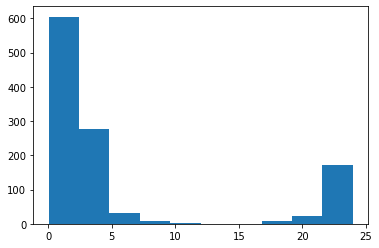

Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.15


,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime,sleep_duration_zscore,bedtime_zscore,activity_zscore
index,,,,,,,,,,,,,,,,,,,,,
11,winter0112,2018-02-08,5,2018-02-09 00:35:45,1235.0,2018-02-08 13:14:15,554.0,0 days 01:51:00,0 days 00:00:00,111.00,...,2018-02-09 09:59:45,6.066667,1675.75,599.75,15853.161472,3.916667,9.916667,-0.727862,-0.071130,-0.850545
4,winter0112,2018-02-09,5,2018-02-10 02:05:30,1325.0,2018-02-09 11:06:15,426.0,0 days 03:52:30,0 days 00:16:45,232.50,...,2018-02-10 12:44:30,8.966667,1666.50,764.50,18256.432910,3.766667,9.766667,0.767527,-0.153528,0.073007
14,winter0112,2018-02-10,500,2018-02-11 01:38:30,1298.0,2018-02-10 13:28:00,568.0,0 days 00:04:30,0 days 00:00:00,4.50,...,2018-02-11 13:21:30,9.525000,1670.00,801.50,20681.729598,3.833333,9.833333,1.055433,-0.116906,1.005024
6,winter0112,2018-02-11,5,2018-02-12 01:21:00,1281.0,2018-02-11 14:01:00,601.0,0 days 02:10:30,0 days 00:00:00,130.50,...,2018-02-12 07:29:30,4.450000,1622.50,449.50,17155.551679,3.033333,9.033333,-1.561498,-0.556361,-0.350050
13,winter0112,2018-02-12,50,2018-02-13 01:41:45,1301.0,2018-02-12 08:10:15,250.0,0 days 02:34:45,0 days 00:56:15,154.75,...,2018-02-13 11:03:15,8.454167,1596.00,663.25,22383.457403,2.600000,8.600000,0.503256,-0.794400,1.658980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,winter0041,2018-02-01,5,2018-02-02 02:44:00,1364.0,2018-02-01 14:32:45,632.0,0 days 05:49:00,0 days 00:00:00,349.00,...,2018-02-02 07:04:45,3.408333,1660.25,424.75,15939.415730,3.666667,9.666667,-1.800887,1.038206,-0.300123
1385,winter0041,2018-02-02,500,2018-02-02 18:17:45,857.0,2018-02-02 08:07:00,247.0,0 days 01:42:15,0 days 01:35:00,102.25,...,2018-02-03 13:40:45,13.912500,1426.00,820.75,26432.053156,23.766667,5.766667,1.734543,-2.325183,1.861836
1387,winter0041,2018-02-03,500,2018-02-03 22:36:30,1116.0,2018-02-03 16:33:15,753.0,0 days 00:32:30,0 days 00:00:00,32.50,...,2018-02-04 07:22:45,5.158333,1573.25,442.75,18600.332103,2.216667,8.216667,-1.211882,-0.212285,0.248147


In [75]:
all_winter_activity = do_everything(all_winter_raw, all_winter_processed)
all_winter_activity

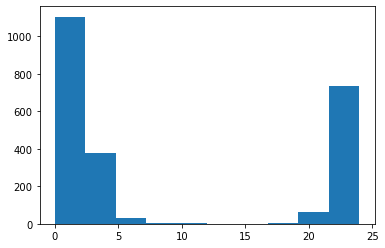

Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.15


,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime,sleep_duration_zscore,bedtime_zscore,activity_zscore
index,,,,,,,,,,,,,,,,,,,,,
14,spring_170019,2017-03-27,5,2017-03-27 22:39:00,1119.0,2017-03-27 17:55:15,835.0,0 days 01:30:30,0 days 00:00:00,90.50,...,2017-03-28 06:39:30,7.675000,1379.00,399.50,8794.651405,22.983333,4.983333,0.215618,-1.196547,1.098797
14,spring_170019,2017-03-28,500,2017-03-28 22:02:15,1082.0,2017-03-28 07:38:15,218.0,0 days 00:38:45,0 days 00:04:00,38.75,...,2017-03-29 06:14:15,7.562500,1360.50,374.25,8228.336297,22.666667,4.666667,0.084226,-1.455572,0.733117
10,spring_170019,2017-03-29,50,2017-03-29 22:06:30,1086.0,2017-03-29 06:21:45,141.0,0 days 05:40:00,0 days 00:53:15,340.00,...,2017-03-30 07:44:45,9.104167,1358.50,464.75,5757.816377,22.633333,4.633333,1.884788,-1.482838,-0.862142
16,spring_170019,2017-03-30,50,2017-03-30 22:12:00,1092.0,2017-03-30 08:14:30,254.0,0 days 02:33:45,0 days 00:48:45,153.75,...,2017-03-31 05:59:15,7.129167,1371.50,359.25,3680.686016,22.850000,4.850000,-0.421878,-1.305611,-2.203383
8,spring_170019,2017-03-31,50,2017-03-31 22:13:00,1093.0,2017-03-31 06:14:15,134.0,0 days 01:50:45,0 days 00:30:15,110.75,...,2017-04-01 09:03:15,8.116667,1496.25,543.25,6228.746048,0.933333,6.933333,0.731455,0.398500,-0.558054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,spring_180067,2018-04-27,50,2018-04-27 20:03:15,963.0,2018-04-27 08:10:15,250.0,0 days 04:33:15,0 days 00:02:30,273.25,...,2018-04-28 09:05:15,9.212500,1432.50,545.25,23740.665630,23.866667,5.866667,0.477706,0.137255,0.638659
2905,spring_180067,2018-04-30,5,2018-04-30 22:26:15,1106.0,2018-04-30 09:04:45,304.0,0 days 06:47:30,0 days 01:09:30,407.50,...,2018-05-01 07:54:00,8.783333,1387.00,474.00,18836.009577,23.116667,5.116667,0.239751,-0.516723,-0.402531
2912,spring_180067,2018-05-03,5,2018-05-03 21:37:30,1057.0,2018-05-03 08:02:00,242.0,0 days 06:03:15,0 days 01:19:00,363.25,...,2018-05-04 09:50:00,11.112500,1363.25,590.00,25138.485698,22.716667,4.716667,1.531173,-0.865511,0.935397


In [76]:
all_spring_activity = do_everything(all_spring_raw, all_spring_processed)
all_spring_activity

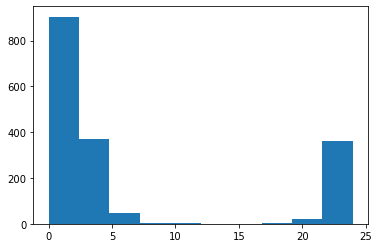

In [ ]:
all_fall_activity = do_everything(all_fall_raw, all_fall_processed)
all_fall_activity

In [ ]:
all_fall_activity.columns

In [30]:
summer_winter = all_summer_activity.append(all_winter_activity, ignore_index=True)
summer_winter_spring = summer_winter.append(all_spring_activity, ignore_index=True)
all_quarters_activity = summer_winter_spring.append(all_fall_activity, ignore_index=True)

In [31]:
all_quarters_activity.to_parquet("data/seattle_undergrad/all_quarters_activity.parquet",
                               engine = "fastparquet", compression="gzip")